In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [21]:
data = pd.read_csv("Dataset_II.csv")

In [22]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [23]:
#ids are not useful. so drop column 1
data.drop(data.columns[0], inplace=True, axis=1)

Text(0.5, 0, 'Age')

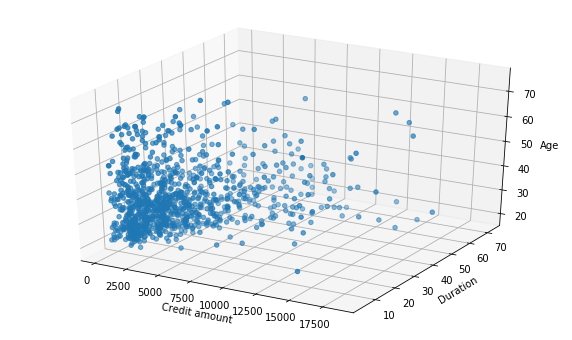

In [24]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [25]:
#taking the numeric values
cols = ["Age","Credit amount","Duration"]
data = data.loc[:,cols]

In [26]:
data=np.log(data)

In [27]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data= pd.DataFrame(data_scaled, columns=data.columns)

In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [29]:
labels = gmm.predict(data)

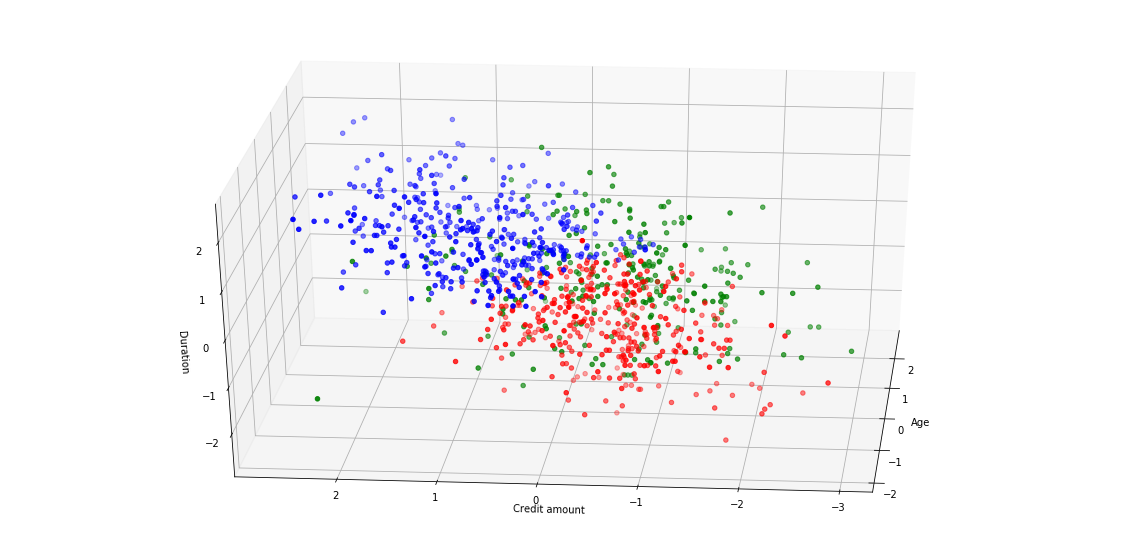

In [30]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
data['label']=labels
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Age"][data.label == 0], data["Credit amount"][data.label == 0], data["Duration"][data.label == 0], c='blue')
ax.scatter(data["Age"][data.label == 1], data["Credit amount"][data.label == 1], data["Duration"][data.label == 1], c='red')
ax.scatter(data["Age"][data.label == 2], data["Credit amount"][data.label == 2], data["Duration"][data.label == 2], c='green')


ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Credit amount")
ax.set_zlabel('Duration')
plt.show()